# Sales Analysis

## Table of contents:

- [Introduction](#intro)
- [1. Importing necessary libraries](#import)
- [2. Gathering data](#gather)
- [3. Assessing data](#assess)
- [4. Cleaning data](#clean)
- [5. Storing cleaned data](#store) 
- [6. Analyze and Visualization](#analyze-visaulize) 

<a id='intro'></a>
## Introduction:

Using Python, Pandas & Matplotlib to analyze and answer business questions about 12 months worth of sales data.<br> 
The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.

<a id='import'></a>
## 1. Importing necessary libraries

In [73]:
# import libraries
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id='gather'></a>
## 2. Gathering data

**All sales data are provided to us in a CSV format.**

In [2]:
os.listdir('./data/')

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

<a id='assess'></a>
## 3. Assessing data

In [3]:
# exploring data
df_jan = pd.read_csv('./data/Sales_January_2019.csv')
df_feb = pd.read_csv('./data/Sales_February_2019.csv')
df_mar = pd.read_csv('./data/Sales_March_2019.csv')
df_apr = pd.read_csv('./data/Sales_April_2019.csv')
df_may = pd.read_csv('./data/Sales_May_2019.csv')
df_jun = pd.read_csv('./data/Sales_June_2019.csv')
df_jul = pd.read_csv('./data/Sales_July_2019.csv')
df_aug = pd.read_csv('./data/Sales_August_2019.csv')
df_sep = pd.read_csv('./data/Sales_September_2019.csv')
df_oct = pd.read_csv('./data/Sales_October_2019.csv')
df_nov = pd.read_csv('./data/Sales_November_2019.csv')
df_dec = pd.read_csv('./data/Sales_December_2019.csv')


In [4]:
df_jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 227.9+ KB


In [6]:
df_jan.isnull().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               9697
True      True     True              True        True        True                  26
dtype: int64

In [7]:
print(f"Jan: {df_jan.shape}")
print(f"Feb: {df_feb.shape}")
print(f"Mar: {df_mar.shape}")
print(f"Apr: {df_apr.shape}")
print(f"May: {df_may.shape}")
print(f"Jun: {df_jun.shape}")
print(f"Jul: {df_jul.shape}")
print(f"Aug: {df_aug.shape}")
print(f"Sep: {df_sep.shape}")
print(f"Oct: {df_oct.shape}")
print(f"Nov: {df_nov.shape}")
print(f"Dec: {df_dec.shape}")

Jan: (9723, 6)
Feb: (12036, 6)
Mar: (15226, 6)
Apr: (18383, 6)
May: (16635, 6)
Jun: (13622, 6)
Jul: (14371, 6)
Aug: (12011, 6)
Sep: (11686, 6)
Oct: (20379, 6)
Nov: (17661, 6)
Dec: (25117, 6)


### Assessment Summary

**Quality issues**
Erroneous datatypes:
- `Quantity Ordered` should be `float`.
- `Price Each` should be `int`.
- `Order Date` should be `datetime`.
- In columns names: Replace space with underscore `_` for easy usage. (Optional)
- Missing Values

**Tidiness issues**
- All sales data from the 12 months should be merged into one dataset.
- `Total Price` column should be added.
- Extact `Month` from `Order Date`.
- Extact `City` from `Purchase Address`.

<a id='clean'></a>
## 4. Cleaning data

**First we merge the datasets to clean it one time**

**Code**

In [8]:
df_all = pd.DataFrame()

for file in os.listdir('./data/'):
    df_temp = pd.read_csv('./data/'+file)
    df_all = pd.concat([df_all, df_temp])
    
df_all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**It is a good practice to work on copies in cleaning stage**

In [9]:
# copy
df_all_clean = df_all.copy()

**1. Remove `NaN` values**

**Define**
- Drop `NaN` values

In [10]:
df_all_clean.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
True      True     True              True        True        True                   545
dtype: int64

**Code**

In [11]:
df_all_clean.dropna(inplace=True)

**Test**

In [12]:
df_all_clean.shape

(186305, 6)

In [13]:
df_all_clean.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
dtype: int64

**2. Rename the columns**


**Define**
- Rename the columns to a lower case and replace the white space with an underscore to easy usage

**Code**

In [14]:
df_all_clean.rename(columns=lambda x: x.lower().replace(' ','_'), inplace=True)

**Test**

In [15]:
for column in df_all_clean.columns:
    print(column) 

order_id
product
quantity_ordered
price_each
order_date
purchase_address


**3. Erroneous datatypes: Quantity Ordered & Price Each Should be `float`**

In [16]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
dtypes: object(6)
memory usage: 5.7+ MB


**Define**
- Convert `Quantity Ordered` & `Price Each` to `float` using `astype()`

**Code**

In [17]:
df_all_clean.quantity_ordered.value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: quantity_ordered, dtype: int64

**4. Remove `"Order ID	Product	Quantity Ordered	Price Each	Order Date	Purchase Addres"` rows** 

In [18]:
df_all_clean.query('quantity_ordered == "Quantity Ordered"')

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [19]:
df_all_clean.drop(df_all_clean.index[df_all_clean.quantity_ordered == "Quantity Ordered"], inplace = True)

**Test**

In [20]:
df_all_clean.query('quantity_ordered == "Quantity Ordered"')

,order_id,product,quantity_ordered,price_each,order_date,purchase_address


**5. Convert the data type**

**Code**

In [21]:
df_all_clean.quantity_ordered = df_all_clean.quantity_ordered.astype(float)
df_all_clean.price_each = df_all_clean.price_each.astype(float)

In [22]:
df_all_clean.order_date = pd.to_datetime(df_all_clean.order_date)

**Test**

In [23]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          182735 non-null  object        
 1   product           182735 non-null  object        
 2   quantity_ordered  182735 non-null  float64       
 3   price_each        182735 non-null  float64       
 4   order_date        182735 non-null  datetime64[ns]
 5   purchase_address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 7.7+ MB


**6. Create `month` column from `order_date`**

**Define**
- Create `month` column from `order_date` column using `month_name()` function

**Code**

In [24]:
df_all_clean['month'] = df_all_clean.order_date.dt.month_name()

**Test**

In [25]:
df_all_clean.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


**6. Create `total_sales` column**

**Define**
- Create `total_sales` column
- `total_price = quantity_ordered * price_each`

**Code**

In [26]:
df_all_clean['total_sales'] = df_all_clean.quantity_ordered * df_all_clean.price_each

**Test**

In [27]:
df_all_clean.sample(5)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales
247,259595,Bose SoundSport Headphones,1.0,99.99,2019-10-22 12:22:00,"735 Ridge St, San Francisco, CA 94016",October,99.99
1109,249218,Wired Headphones,1.0,11.99,2019-09-12 13:12:00,"611 Center St, Los Angeles, CA 90001",September,11.99
14488,273189,Wired Headphones,1.0,11.99,2019-10-27 10:39:00,"70 Church St, Los Angeles, CA 90001",October,11.99
1903,163821,Apple Airpods Headphones,1.0,150.00,2019-03-05 06:56:00,"496 Church St, San Francisco, CA 94016",March,150.00
3780,197686,USB-C Charging Cable,1.0,11.95,2019-05-12 05:50:00,"483 Hickory St, Atlanta, GA 30301",May,11.95


**6. Create `city` column**

**Define**
- Extact city name from purchase_address using regular expression

In [72]:
df_all_clean.sample(10)['purchase_address']

6235              23 Johnson St, Atlanta, GA 30301
13438     811 Lakeview St, New York City, NY 10001
1794         854 Adams St, New York City, NY 10001
5292           614 Lakeview St, Portland, OR 97035
19617    871 Jefferson St, New York City, NY 10001
10741         294 Park St, San Francisco, CA 94016
5774         362 River St, San Francisco, CA 94016
18297             396 Sunset St, Seattle, WA 98101
6886           315 Cedar St, Los Angeles, CA 90001
13855            119 Jackson St, Atlanta, GA 30301
Name: purchase_address, dtype: object

**Code**

In [96]:
# test
test_pattern = re.compile(r'(?:St,\s)(\w+\s?\w+\s?\w+\s?,\s\w+)')

test_text1 = "23 Johnson St, Atlanta, GA 30301"
test_text2 = "854 Adams St, New York City, NY 10001"
test_text3 = "315 Cedar St, Los Angeles, CA 90001"

resutl1 = re.findall(test_pattern, test_text1)
resutl2 = re.findall(test_pattern, test_text2)
resutl3 = re.findall(test_pattern, test_text3)

print(resutl1, resutl2, resutl3)

['Atlanta, GA'] ['New York City, NY'] ['Los Angeles, CA']


In [97]:
pattern = r'(?:St,\s)(\w+\s?\w+\s?\w+\s?,\s\w+)'
df_all_clean['city'] = df_all_clean.purchase_address.str.extract(pattern)

**Test**

In [98]:
df_all_clean.sample(20)[['purchase_address', 'city']]

,purchase_address,city
6761,"748 Main St, Boston, MA 02215","Boston, MA"
5827,"440 2nd St, Los Angeles, CA 90001","Los Angeles, CA"
1592,"325 Dogwood St, San Francisco, CA 94016","San Francisco, CA"
6307,"718 14th St, San Francisco, CA 94016","San Francisco, CA"
9718,"301 Johnson St, San Francisco, CA 94016","San Francisco, CA"
4164,"956 6th St, New York City, NY 10001","New York City, NY"
20358,"243 Lake St, San Francisco, CA 94016","San Francisco, CA"
1735,"999 Adams St, Dallas, TX 75001","Dallas, TX"
15231,"64 Adams St, Portland, OR 97035","Portland, OR"
8371,"251 6th St, Los Angeles, CA 90001","Los Angeles, CA"


**Another way**
Use `apply()` method on df_all.purchase_address with `lambda`
```
df_all['city'] = df_all.purchase_address.apply(lambda x: x.split(',')[1])
```

<a id='store'></a>
## 5. Storing cleaned data

In [99]:
df_all_clean.to_csv('./output/all_data_master.csv', index=False)

In [100]:
# load cleaned csv file
df = pd.read_csv('./output/all_data_master.csv')
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total_sales,city
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,"Boston, MA"
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA"
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA"
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA"


<a id='analyze-visaulize'></a>
## 6. Analyze and Visualization

### Q1: What was the best month for sales? How much was earned that month?

In [101]:
# using groupby
df.groupby('month').sum().sort_values('total_sales', ascending=False)

,order_id,quantity_ordered,price_each,total_sales
month,,,,
December,7593831188,27764.0,4.533152e+06,4.557905e+06
October,5374745444,22356.0,3.658885e+06,3.679254e+06
April,3333217539,20226.0,3.313522e+06,3.336376e+06
November,4964034464,19479.0,3.130969e+06,3.149785e+06
May,3289290354,18344.0,3.084756e+06,3.101881e+06
March,2520234917,16697.0,2.740393e+06,2.755969e+06
July,3224356195,15781.0,2.572765e+06,2.587445e+06
June,2876409942,14964.0,2.508863e+06,2.524465e+06
August,2840777365,13185.0,2.178184e+06,2.191698e+06


In [110]:
# Reordering months
months_sales = df.groupby('month').sum().sort_values('total_sales', ascending=False)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

months_sales.index = pd.CategoricalIndex(months_sales.index, categories=months, ordered=True)
months_sales = months_sales.sort_index()

months_sales

,order_id,quantity_ordered,price_each,total_sales
month,,,,
January,1391148846,10670.0,1.776156e+06,1.786511e+06
February,1832181724,13162.0,2.145209e+06,2.158127e+06
March,2520234917,16697.0,2.740393e+06,2.755969e+06
April,3333217539,20226.0,3.313522e+06,3.336376e+06
May,3289290354,18344.0,3.084756e+06,3.101881e+06
June,2876409942,14964.0,2.508863e+06,2.524465e+06
July,3224356195,15781.0,2.572765e+06,2.587445e+06
August,2840777365,13185.0,2.178184e+06,2.191698e+06
September,2886380303,12827.0,2.038020e+06,2.050361e+06


[*Resource: Pandas series sort by month index*](https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index) 

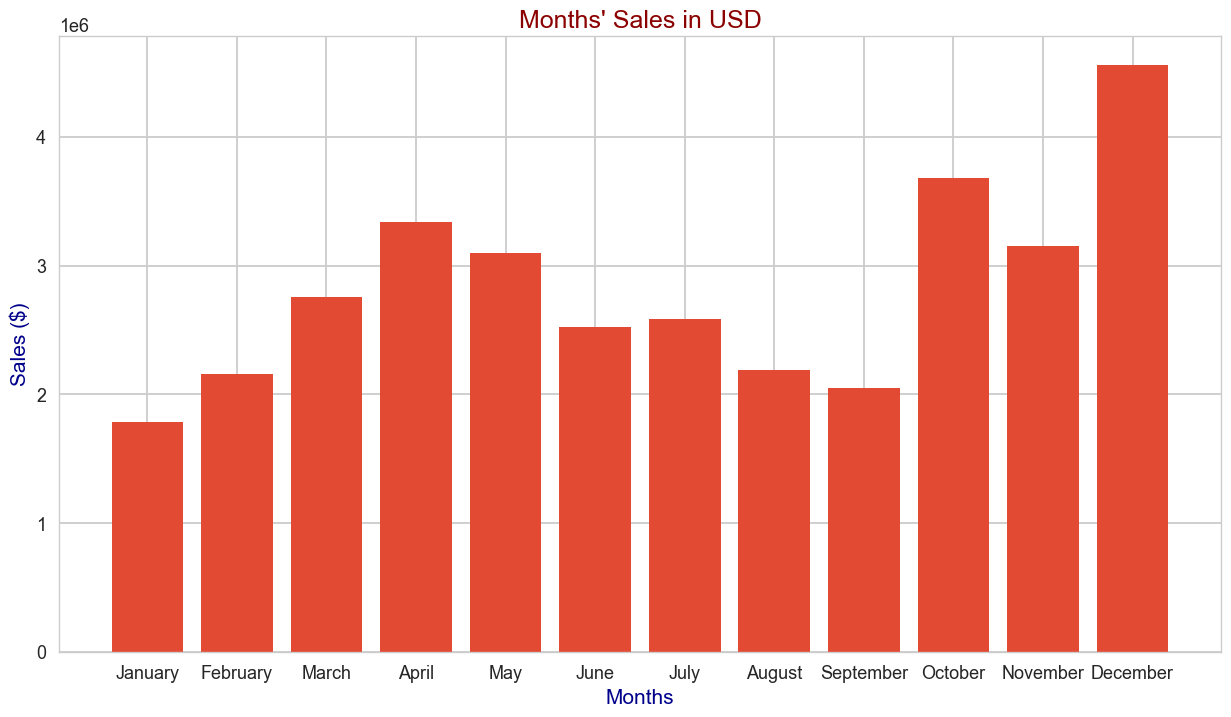

In [131]:
# using plot
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 8))

plt.bar(months, months_sales.total_sales)

plt.xticks(months)
plt.xlabel("Months", color='darkblue', size=15)
plt.ylabel("Sales ($)", color='darkblue', size=15)
plt.title("Months' Sales in USD", color='darkred', size=18)

plt.savefig("./img/01_months_sales", dpi=300)
plt.show()

**December was the best month for sales with 4.557905e+06 USD**

### Q2 What city sold the most product?

In [109]:
df.groupby('city').sum().sort_values('total_sales', ascending=False)

,order_id,quantity_ordered,price_each,total_sales
city,,,,
"San Francisco, CA",10127798551,49363.0,8.074046e+06,8.124121e+06
"Los Angeles, CA",6698824762,32722.0,5.323916e+06,5.354040e+06
"New York City, NY",5643048641,27470.0,4.553287e+06,4.581659e+06
"Boston, MA",4517043947,22123.0,3.580075e+06,3.604081e+06
"Atlanta, GA",3366679952,16304.0,2.726247e+06,2.741642e+06
"Dallas, TX",3360280471,16453.0,2.702619e+06,2.717794e+06
"Seattle, WA",3350585611,16281.0,2.678871e+06,2.693049e+06
"Portland, OR",2269245678,11110.0,1.822878e+06,1.832539e+06
"Austin, TX",2238557673,10933.0,1.777232e+06,1.786746e+06


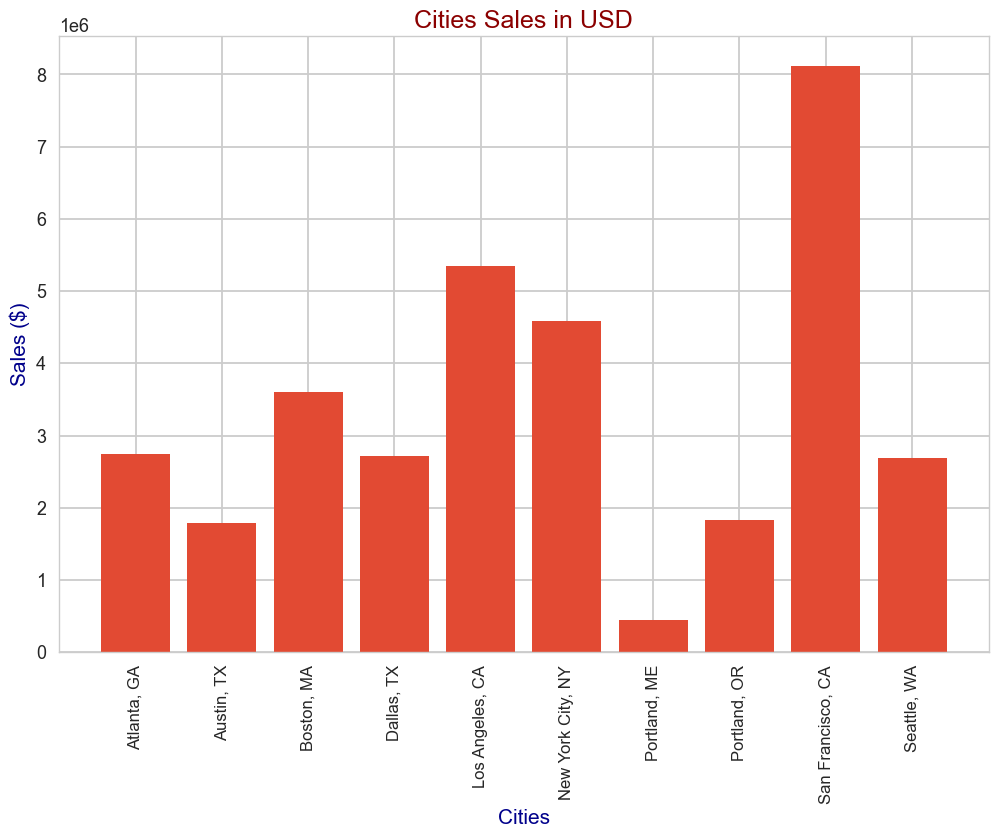

In [135]:
# using plot
city_sales = df.groupby('city').sum()
cities = [city for city, df in df.groupby('city')]

plt.figure(figsize=(12, 8))

plt.bar(cities, city_sales.total_sales)

plt.xticks(cities, rotation='vertical', size=12)
plt.xlabel("Cities", color='darkblue', size=15)
plt.ylabel("Sales ($)", color='darkblue', size=15)
plt.title("Cities Sales in USD", color='darkred', size=18)

plt.savefig("./img/02_city_sales", dpi=300)
plt.show()

### Q3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [68]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
